# How do the roles of an actor influence their career?

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.stats import gaussian_kde

## I. Determining the importance or significance of a character in a movie

To produce our analysis, we first need to get information about types of roles. How important is a character compared to other characters in the movie? To answer this question, we looked at the number of times their names was mentionned in the summary compared to other characters of the same movie.

This was achieved in the roles_preprocessing.ipynb file. The output of this file is a character dataframe with a new feature 'role'. In this feature can be found the number of times the name of the character is mentionned in the movie summary.

In [3]:
char= pd.read_csv('Data\preprocessed_data\char_with_roles_filtered.csv')

#### Plot random movies to get an idea of the distribution of number of character name mentions

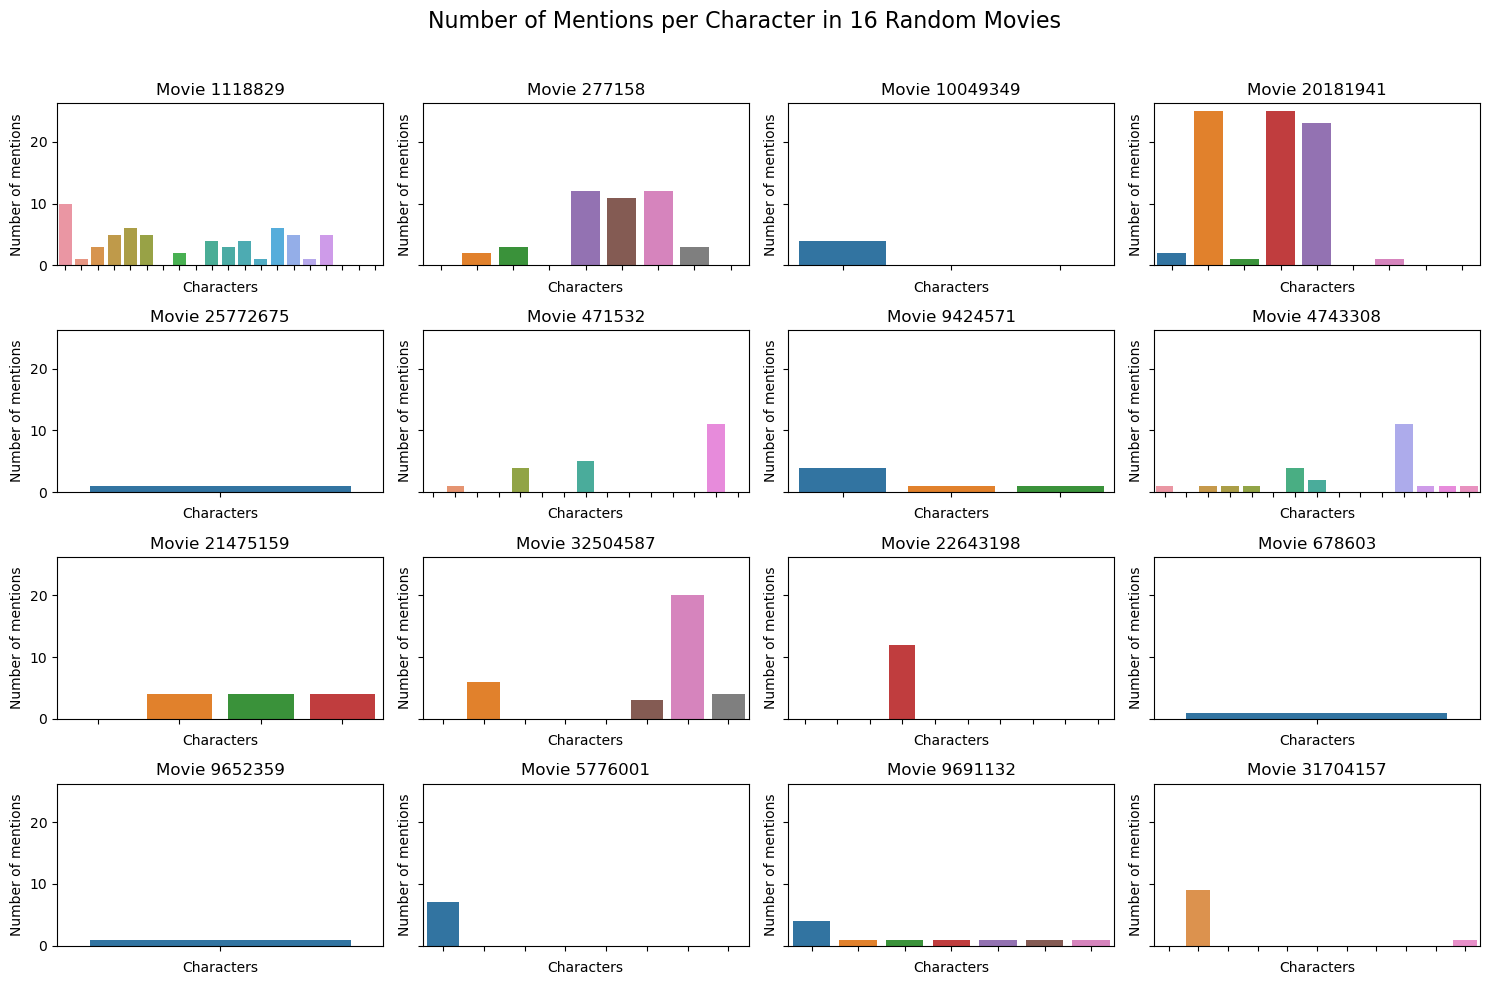

In [4]:
# Generate random Movie IDs
np.random.seed(49) 
random_movie_ids = np.random.choice(char['Wiki ID'].unique(), 16, replace=False)


fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True)
fig.suptitle('Number of Mentions per Character in 16 Random Movies', fontsize=16)
axes = axes.flatten()
for i, movie_id in enumerate(random_movie_ids):
    characters = char[char['Wiki ID'] == movie_id]
    sns.barplot(ax=axes[i], data=characters,x='char name', y='role', errorbar=None)
    axes[i].set_xticklabels([])
    axes[i].set_title(f'Movie {movie_id}')
    axes[i].set_xlabel('Characters')
    axes[i].set_ylabel('Number of mentions')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Our initial idea was to put the character roles in categories (lead role, secondary role or small role) depending on the number of time their name was mentionned in the summary compared to other charaters. However, we observe on the above plots that the distribution of name mentions is very different from movie to movie. This is due to the fact that every summary varies in length and focus more or less on characters. For this reason, we decided not to categorize the roles since the ideal categories differ depending on the movie. To give information about the importance of a role in a movie, we put in the 'role_ratio' feature the ratio of mentions of the character name over the mentions of every character name in the movie. 

In [5]:
char['sum_role'] = char.groupby('Wiki ID')['role'].transform('sum')
char['role_ratio'] = char['role'] / char['sum_role']
char = char.drop(columns=['sum_role'])

In [6]:
char.head()

,Wiki ID,movie ID,release date,char name,DOB,gender,heght,ethnicity,actor name,actor age,map ID,char ID,actor ID,role,role_ratio
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,0,0.000000
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,8,0.470588
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,4,0.235294
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,3,0.176471
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,0,0.000000


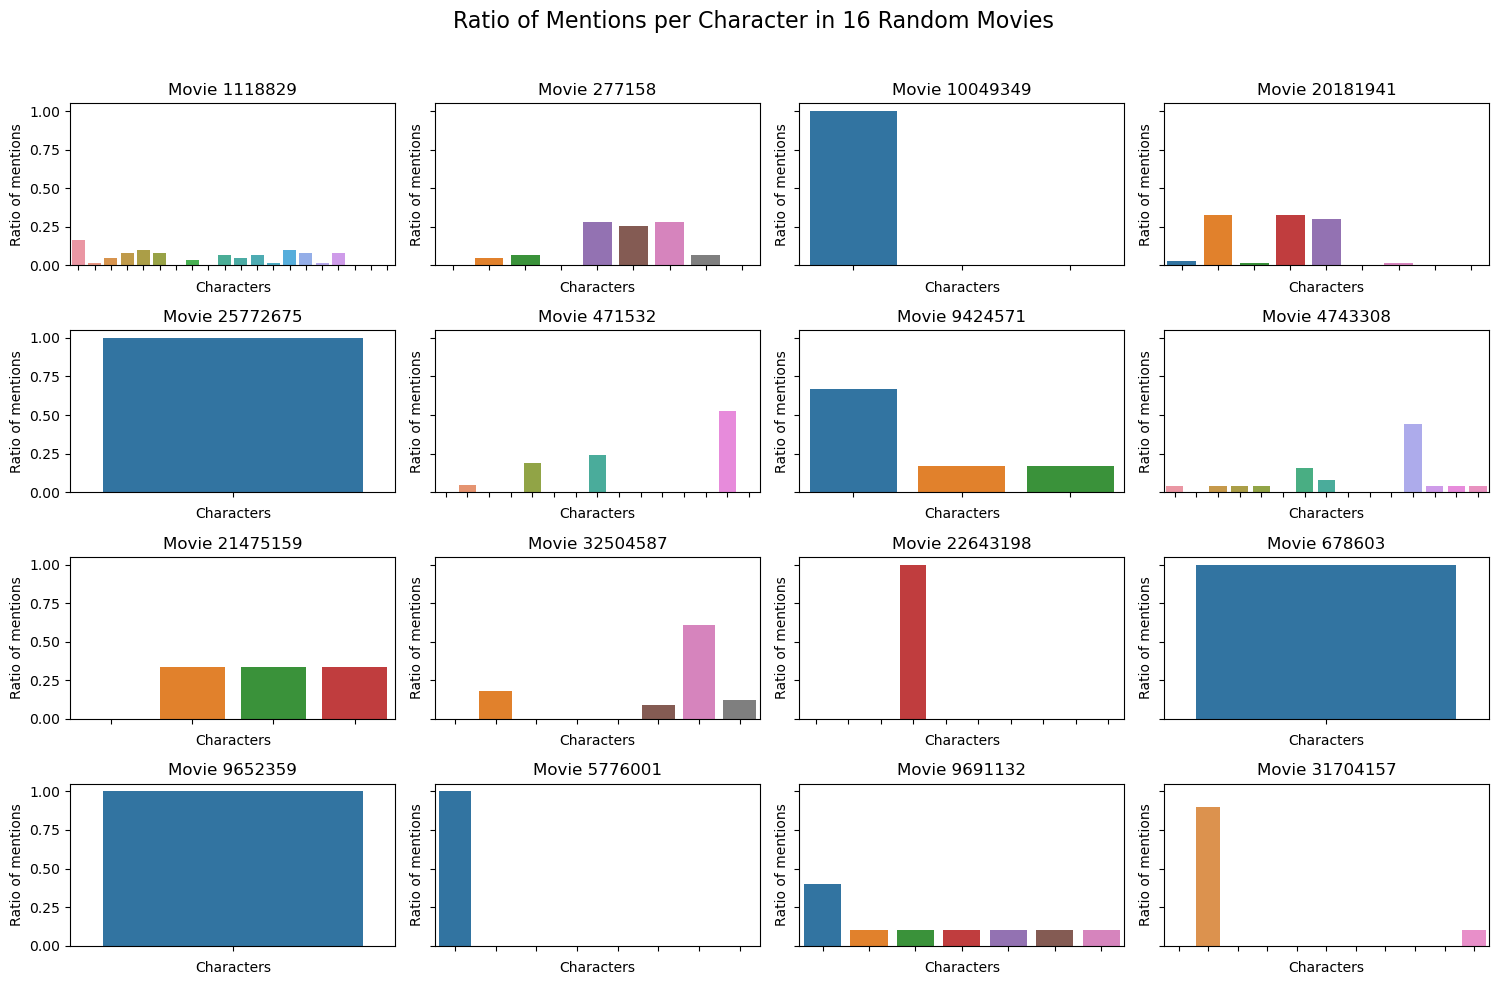

In [9]:
np.random.seed(49) 
random_movie_ids = np.random.choice(char['Wiki ID'].unique(), 16, replace=False)


fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True)
fig.suptitle('Ratio of Mentions per Character in 16 Random Movies', fontsize=16)
axes = axes.flatten()
for i, movie_id in enumerate(random_movie_ids):
    characters = char[char['Wiki ID'] == movie_id]
    sns.barplot(ax=axes[i], data=characters,x='char name', y='role_ratio', errorbar=None)
    axes[i].set_xticklabels([])
    axes[i].set_title(f'Movie {movie_id}')
    axes[i].set_xlabel('Characters')
    axes[i].set_ylabel('Ratio of mentions')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# II. Actors popularity data

The actors analysis has the aim to find the actor's popularity rating in TMDB, along with additional information. The result of our preprocessing is stored in the path file `Data/preprocessed_data/actors_db.csv` with the preprocessing file in `Preprocessing/actors_preprocessing.ipynb`.  


In [44]:
actors_db = pd.read_csv('Data/preprocessed_data/actors_db.csv')

def get_popular_movies(actor_id):
    actor_movies_str = actors_db[actors_db['id'] == actor_id]['known_for'].values[0]
    actor_movies_list = ast.literal_eval(actor_movies_str)
    popular_movies = sorted(actor_movies_list, key=lambda x: x['popularity'], reverse=True)
    return pd.json_normalize(popular_movies)

def average_popularity(actor_id):
    popular_movies_df = get_popular_movies(actor_id)
    return np.mean(popular_movies_df["popularity"])

# Add a column to the actors_db dataframe with the average popularity of the actor's top 3 movies.
actors_db['avg_popularity'] = actors_db['id'].apply(average_popularity)

display(actors_db)


,name,gender,popularity,original_language,genre_ids,known_for,id,avg_popularity
0,Sangeeth Shobhan,0,226.892,te,"[[35, 10749, 18], [35, 10751], [18, 35]]","[{'adult': False, 'backdrop_path': '/jBnnkkXRZ...",3234630,7.843667
1,Gary Oldman,2,220.449,en,"[[18, 28, 80, 53], [28, 80, 18, 53], [18, 36]]","[{'adult': False, 'backdrop_path': '/nMKdUUepR...",64,79.362667
2,Angeli Khang,1,199.449,tl,"[[18, 53], [18], [18, 10749]]","[{'adult': False, 'backdrop_path': '/27bkw4o1z...",3194176,30.022000
3,Florence Pugh,1,176.589,en,"[[27, 18, 9648], [28, 12, 878], [18, 10749]]","[{'adult': False, 'backdrop_path': '/aAM3cQmYG...",1373737,59.871667
4,Jason Statham,2,162.466,en,"[[80, 35], [28, 878, 27], [28, 80, 53]]","[{'adult': False, 'backdrop_path': '/ysKahAEPP...",976,57.353333
...,...,...,...,...,...,...,...,...
9577,Alice Isaaz,1,14.133,fr,"[[18, 10749], [18, 53], [35]]","[{'adult': False, 'backdrop_path': '/vzcJQORoL...",1288047,11.796333
9578,Peter Cullen,2,14.133,en,"[[28, 12, 878], [878, 28, 12, 53], [28, 12, 878]]","[{'adult': False, 'backdrop_path': '/2vFuG6bWG...",19540,272.561000
9579,Mary Crosby,1,14.133,en,"[[28, 12, 37], [878, 28, 12, 35], [35, 18, 104...","[{'adult': False, 'backdrop_path': '/eCebbqmTs...",18465,15.113333
9580,Daisuke Namikawa,2,14.131,ja,"[[16, 10759], [16, 10759, 10765], [10759, 16, ...","[{'adult': False, 'backdrop_path': '/zotzm1Iza...",110665,150.523333


In our database, we have access to the complete information about the 3 most popular movies of each actor. Since our analysis relies on the actor's career, we first assume that this latter should be correlated with the popularity of their movies.  
The information we have access to is represented as the following:

In [47]:
oldman_example = get_popular_movies(64)
ordered_columns = ["title", "popularity", "original_language", "genre_ids", "release_date", "vote_average", "vote_count", "id", "overview"]
oldman_example[ordered_columns]

,title,popularity,original_language,genre_ids,release_date,vote_average,vote_count,id,overview
0,The Dark Knight,127.121,en,"[18, 28, 80, 53]",2008-07-16,8.513,30883,155,Batman raises the stakes in his war on crime. ...
1,The Dark Knight Rises,78.615,en,"[28, 80, 18, 53]",2012-07-17,7.777,21486,49026,Following the death of District Attorney Harve...
2,Darkest Hour,32.352,en,"[18, 36]",2017-11-22,7.350,4789,399404,"In May 1940, the fate of World War II hangs on..."


In order for us to get a first idea of our data, we plotted in a scatter plot the popularity of actors against the average popularity of their 3 best movies.   
We also added a linear regression line to see if there is a correlation between the two variables.

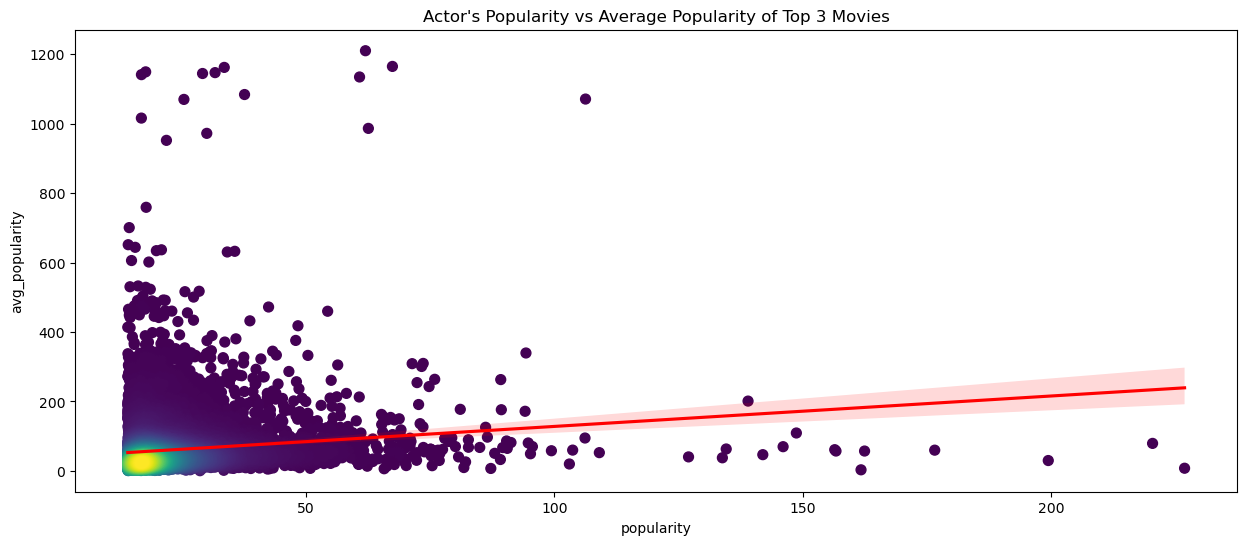

The correlation coefficient is 0.13


In [64]:
x = actors_db['popularity']
y = actors_db['avg_popularity']

# Calculate the point density for the scatter plot
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel("Actor's Popularity")
ax.set_ylabel("Average Popularity of Top 3 Movies")
ax.set_title("Actor's Popularity vs Average Popularity of Top 3 Movies")
ax.scatter(x, y, c=z, s=50)
sns.regplot(x=x, y=y, scatter=False, color='red')
plt.show()

corr = np.corrcoef(x, y)[0, 1]
print(f"The correlation coefficient is {corr:.2f}")


The numerical correlation coefficient being 0.13, it is a positive value even if it is small. Obviously, we still need to get further with our analysis. We can assume that an actor could have had a specific movie that launched his/her career, so taking the average value would lower the numbers. Following this first preprocessing and analysis, we will make further analysis to identify key milestones in their career and understand when their popularity was launched.

# III. Associate a genre to actors

The preprocessing classifying actors to their perceived genre is done in the notebook 'Preprocessing/actor_associate_genre.ipynb'.

The goal of this pre-processing is to classify actors into their most associated genres by taking a mean of the genres of their most known movies. We compute two types of means, a non-weighted one, and a one weighted by the popularity of their movies, the goal being to be able to approximate as much as possible the true perception we have of these actors.

In [4]:
actors_genre = pd.read_csv('Data/preprocessed_data/actor_genre.csv')
display(actors_genre)

,name,genre_ids,movies,popularity,genre_mean,genre_mean_weighted
0,Sangeeth Shobhan,"[[35, 10749, 18], [18, 35]]","['MAD', 'Prema Vimanam']","[8.439, 5.124]","['Comedy', 'Drama']",['Romance']
1,Gary Oldman,"[[18, 28, 80, 53], [28, 80, 18, 53], [18, 36]]","['The Dark Knight', 'The Dark Knight Rises', '...","[127.121, 78.615, 32.352]",['Drama'],['Crime']
2,Angeli Khang,"[[18, 53], [18], [18, 10749]]","['Silip Sa Apoy', ""Selina's Gold"", 'Eva']","[31.85, 26.984, 31.232]",['Drama'],['Romance']
3,Florence Pugh,"[[27, 18, 9648], [28, 12, 878], [18, 10749]]","['Midsommar', 'Black Widow', 'Little Women']","[53.79, 89.461, 36.364]",['Drama'],['Mystery']
4,Jason Statham,"[[80, 35], [28, 878, 27], [28, 80, 53]]","['Snatch', 'The Meg', 'The Transporter']","[36.288, 101.3, 34.472]","['Crime', 'Action']",['Science Fiction']
...,...,...,...,...,...,...
9968,Alice Isaaz,"[[16, 10749, 18]]",['Flavors of Youth'],[17.76],"['Animation', 'Romance', 'Drama']",['Romance']
9969,Peter Cullen,"[[27], [18], [878, 53, 18, 80]]","['Hostel: Part III', 'Whip It', 'The Butterfly...","[32.287, 12.522, 16.667]",['Drama'],['Science Fiction']
9970,Mary Crosby,"[[12, 35, 10751, 878], [18, 9648, 53]]","['Honey, I Blew Up the Kid', 'Missing']","[17.743, 12.992]","['Adventure', 'Comedy', 'Family', 'Science Fic...",['Family']
9971,Daisuke Namikawa,"[[12, 18, 35], [35], [9648, 18, 35, 80]]","['Fear and Loathing in Las Vegas', 'The New Gu...","[26.421, 15.943, 14.843]",['Comedy'],['Mystery']


Let's take some known examples, Ryan Gosling and Rachel McAdam should be classified as Romance actors:

In [9]:
# Display the rows for Rachel McAdams and Ryan Gosling
display(actors_genre[actors_genre['name'].isin(['Rachel McAdams', 'Ryan Gosling'])])

,name,genre_ids,movies,popularity,genre_mean,genre_mean_weighted
95,Ryan Gosling,"[[35, 18, 10749, 10402], [878, 18], [18, 53, 80]]","['La La Land', 'Blade Runner 2049', 'Drive']","[41.818, 113.999, 45.789]",['Drama'],['Romance']
349,Rachel McAdams,"[[10749, 18], [28, 12, 14], [28, 12, 80, 9648]]","['The Notebook', 'Doctor Strange', 'Sherlock H...","[67.813, 75.069, 45.599]","['Action', 'Adventure']",['Romance']


# IV. Budget Preprocessing and Preliminary Analysis

The preprocessing for the Budget analysis is done is a separate file: budget_tmdb_preprocessing.ipynb. In this file, we fetch data from TMDB movie dataset, using a manually made map to the TMDB movie ID.

## Exploratory data analysis

In [2]:
import json
from pathlib import Path
data_path = Path("Data/tmdb_resources")
tmdb_id2detail = { k:json.loads(v) for k,v in json.load(open(data_path / 'tmdb_id2detail_small.json','r')).items() }
tmdb_id2credit = { k:json.loads(v) for k,v in json.load(open(data_path / 'tmdb_id2credit.json','r')).items() }

In [6]:
data_path = Path("Data/tmdb_resources")
file_path = data_path / 'tmdb_id2detail.json'

if file_path.exists():
    with open(file_path, 'r') as file:
        tmdb_id2detail = {k: json.loads(v) for k, v in json.load(file).items()}
else:
    print(f"File not found: {file_path}")

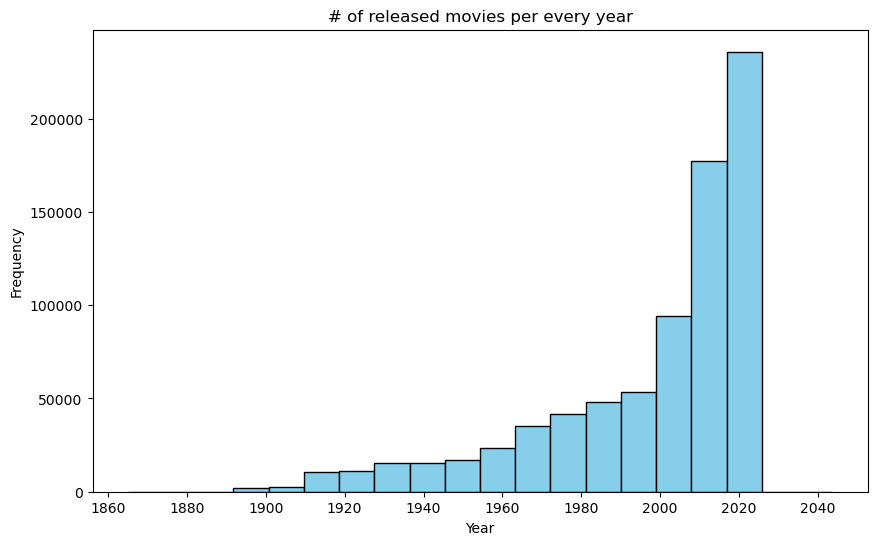

In [9]:
dates = pd.to_datetime([x['release_date'] for x in tmdb_id2detail.values()])

plt.figure(figsize=(10, 6))
plt.hist(dates, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('# of released movies per every year')
plt.show()

Each year, the number of movies grew exponentially. This trend reminds us to be very careful when analyzing data across years. ex. Simpson's paradox

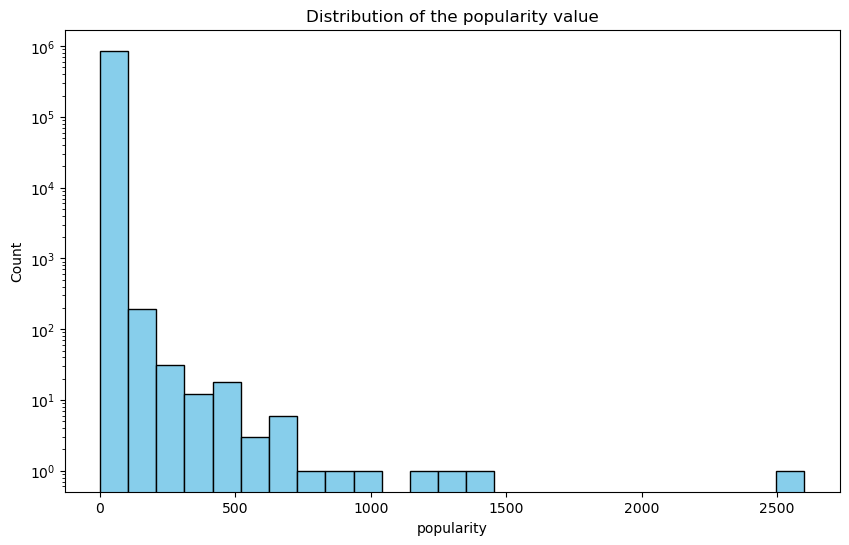

In [10]:
dates = [x['popularity'] for x in tmdb_id2detail.values()]

plt.figure(figsize=(10, 6))
plt.hist(dates, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('popularity')
plt.yscale('log')
plt.ylabel('Count')
plt.title('Distribution of the popularity value')
plt.show()

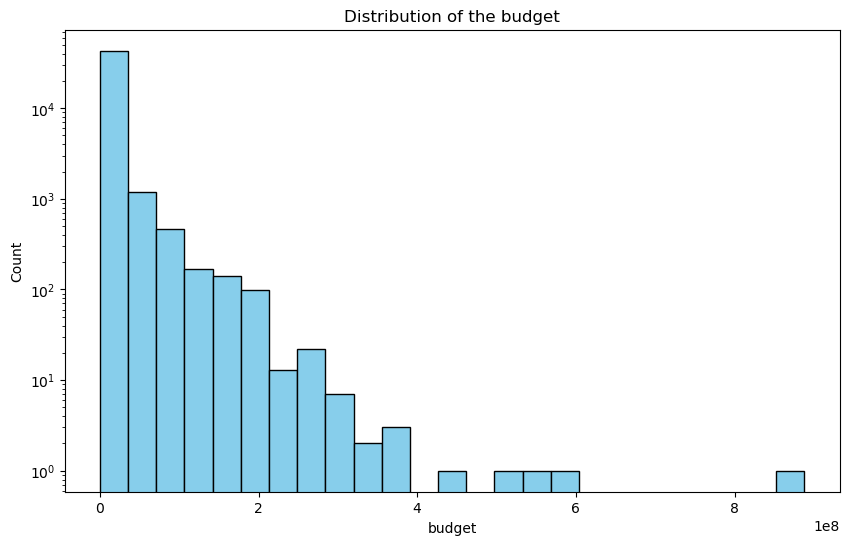

In [11]:
dates = [x['budget'] for x in tmdb_id2detail.values() if x['budget'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(dates, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('budget')
plt.yscale('log')
plt.ylabel('Count')
plt.title('Distribution of the budget')
plt.show()

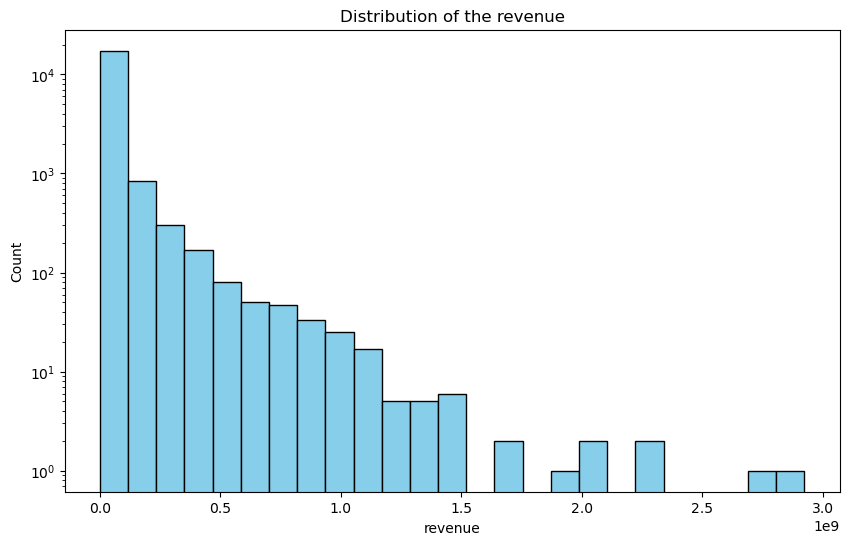

In [12]:
dates = [x['revenue'] for x in tmdb_id2detail.values() if x['revenue'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(dates, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('revenue')
plt.yscale('log')
plt.ylabel('Count')
plt.title('Distribution of the revenue')
plt.show()

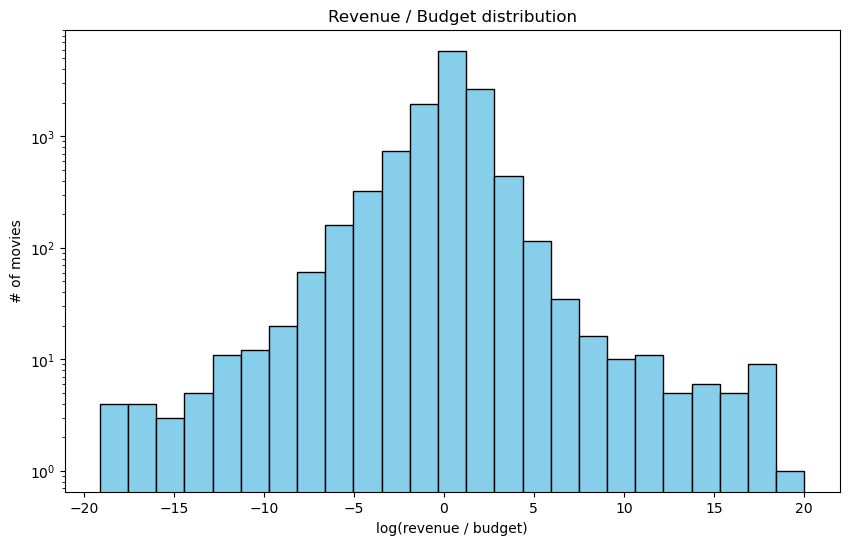

In [14]:
import math
ratios = [math.log(x['revenue'] / x['budget']) for x in tmdb_id2detail.values() if x['revenue'] > 0 and x['budget'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('log(revenue / budget)')
plt.yscale('log')
plt.ylabel('# of movies')
plt.title('Revenue / Budget distribution')
plt.show()

In [15]:
from scipy import stats
statistic, p_value = stats.normaltest(ratios)
print(statistic, p_value)
print(np.mean(ratios), np.std(ratios))

2778.555734602414 0.0
0.28286353973791983 2.192743877510451


The logarithm of the ratio of Revenue divided by budget looks like it follows a normal distribution. On average, the movie's revenue is 33% (e ^ 0.283 = 1.33) higher than the budget. According to the IMDB, the typical break-even point(BEP) is around 2.5x the budget of the movie.

In [16]:
len([ r for r in ratios if r < math.log(2.5)]) / len(ratios)

0.638343877632738

Based on the assumption of that typical BEP is 2.5, 63.8% of the entire movies failed to make a profit. To see if this interesting data varies by movie budget, we performed an additional boxplot analysis. 

In [17]:
from collections import defaultdict

budgets = [x['budget'] for x in tmdb_id2detail.values() if x['revenue'] > 0 and x['budget'] > 0]

budgets_with_ratios = [(x,y) for x,y in zip(budgets, ratios)]
budgets_with_ratios = sorted(budgets_with_ratios, key=lambda x: x[0])


bin_num = 10
bin_size = len(budgets_with_ratios) / bin_num

ratios_per_budget_interval = [[] for _ in range(bin_num)]
labels = [[max(budgets),min(budgets)] for _ in range(bin_num)]

for i, (budget, ratios) in enumerate(budgets_with_ratios):
    group = math.floor(i / bin_size)
    ratios_per_budget_interval[group].append(ratios)
    labels[group][0] = min(labels[group][0], budget)
    labels[group][1] = max(labels[group][1], budget)

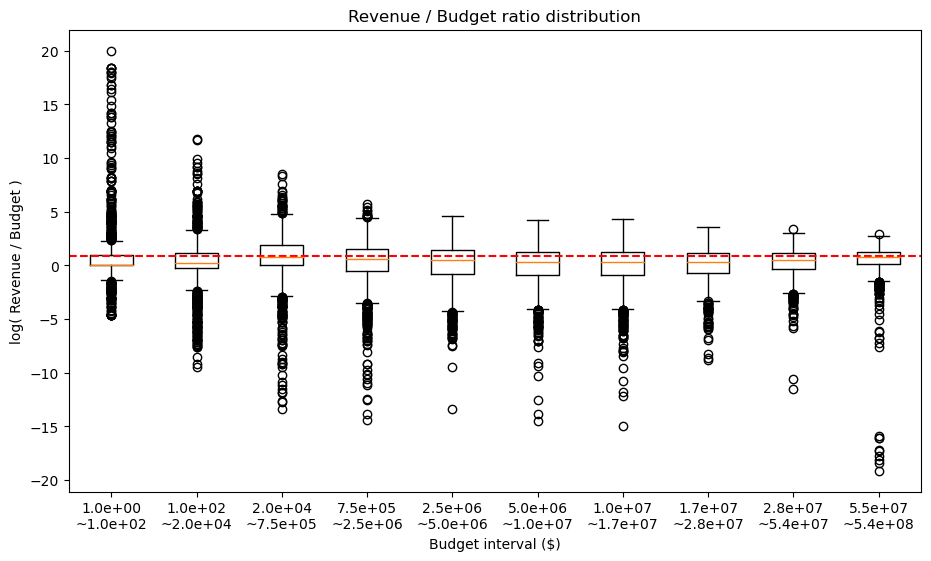

In [18]:
plt.figure(figsize=(11, 6))
label_str = [f"{min_v:.1e}\n~{max_v:.1e}" for min_v, max_v in labels]
plt.boxplot(ratios_per_budget_interval, labels = label_str)
plt.xlabel('Budget interval ($)')
plt.ylabel('log( Revenue / Budget )')

plt.axhline(y=math.log(2.5), color='r', linestyle='--', label='y=0')
plt.title('Revenue / Budget ratio distribution')
plt.show()

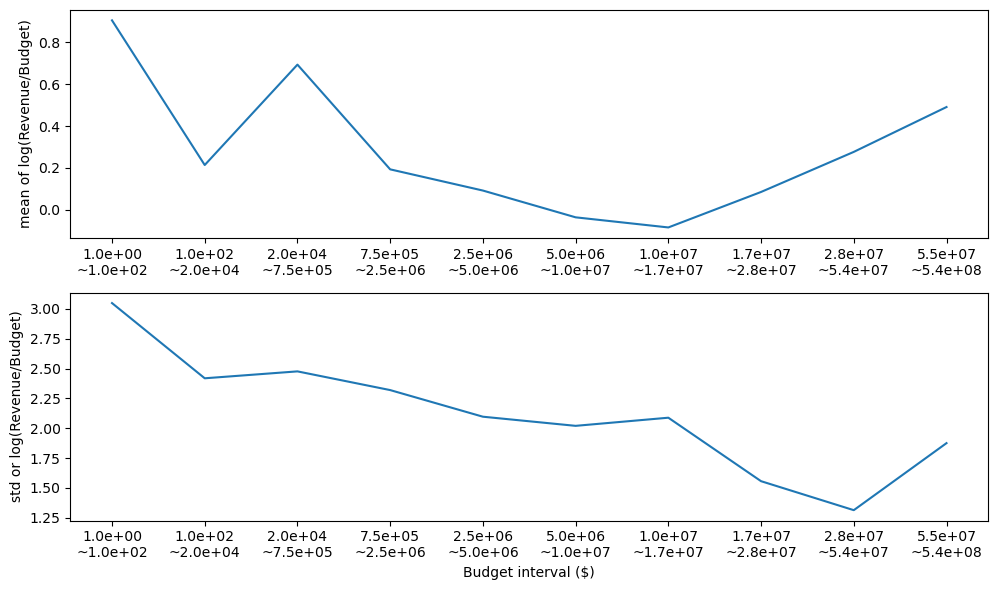

In [19]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(label_str, [np.mean(x) for x in ratios_per_budget_interval])
plt.ylabel('mean of log(Revenue/Budget)')

plt.subplot(2, 1, 2)
plt.plot(label_str, [np.std(x) for x in ratios_per_budget_interval])
plt.ylabel('std or log(Revenue/Budget)')
plt.xlabel('Budget interval ($)')

plt.tight_layout()
plt.show()

Looking at the graph showing the average and standard deviation, as the production cost of a movie increases, the standard deviation of the success rate decreases and becomes stable, but there is a section in the middle where the average success rate decreases significantly.

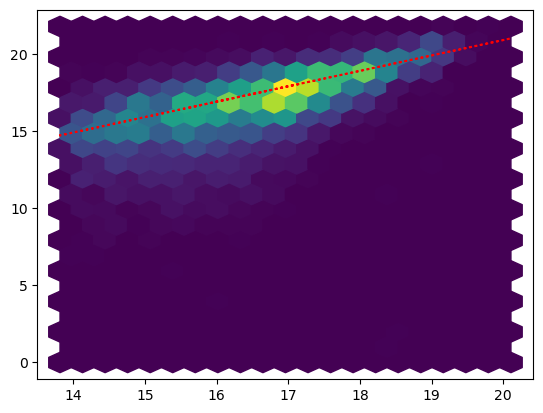

In [20]:
budgets = [math.log(x['budget']) for x in tmdb_id2detail.values() if x['revenue'] > 0 and x['budget'] > 1000000]
revenues = [math.log(x['revenue']) for x in tmdb_id2detail.values() if x['revenue'] > 0 and x['budget'] > 1000000]
plt.hexbin(budgets, revenues, gridsize=20)
plt.plot(budgets, [ x + math.log(2.5) for x in budgets], label='y=x', color='red', linestyle=':')

It is difficult to derive meaningful intuition also in hexbinplot. Red-dotted line is BEP.

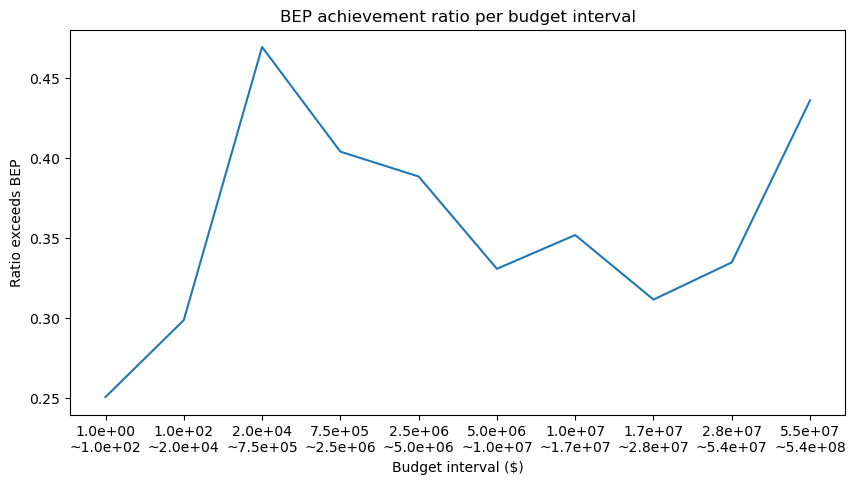

In [21]:
bep_over_ratios = []

for ratios in ratios_per_budget_interval:
    bep_over_ratios.append(len([r for r in ratios if r > math.log(2.5)]) / len(ratios))

plt.figure(figsize=(10, 5))
plt.plot(label_str, bep_over_ratios)
plt.xlabel('Budget interval ($)')
plt.ylabel('Ratio exceeds BEP')
plt.title('BEP achievement ratio per budget interval')
plt.show()

When analyzing the proportion of movies that generate a profit in each budget segment, we observe a bimodal distribution. Based on this, we can establish a criterion to categorize films into low-budget and high-budget groups. This categorization aims to minimize bias due to differences in success rates between the groups. It is expected that this will help identify a critical point for classification. This approach will be instrumental in addressing our research question, 'What is better for an actor's career: a lead role in a less-known/lower-budget movie or a secondary role in a successful/higher-budget movie?' This classification will provide a basis for our analysis.

In [22]:
min_diff = -1
min_idx = -1

for i in range(len(budgets_with_ratios)):
    if i == 0:
        continue
    lower_budget_group = [ x[1] for x in budgets_with_ratios[:i] ] 
    higher_budget_group = [ x[1] for x in budgets_with_ratios[i:] ]
    lower_success_rate = len([r for r in lower_budget_group if r > math.log(2.5)]) / len(lower_budget_group)
    higher_success_rate = len([r for r in higher_budget_group if r > math.log(2.5)]) / len(higher_budget_group)
    diff = abs(higher_success_rate - lower_success_rate)
    if min_diff == -1 or diff < min_diff:
        min_diff = diff
        min_idx = i

In [23]:
min_diff, budgets_with_ratios[min_idx]

(4.998745552875494e-06, (9500000, 0.6390799592896695))

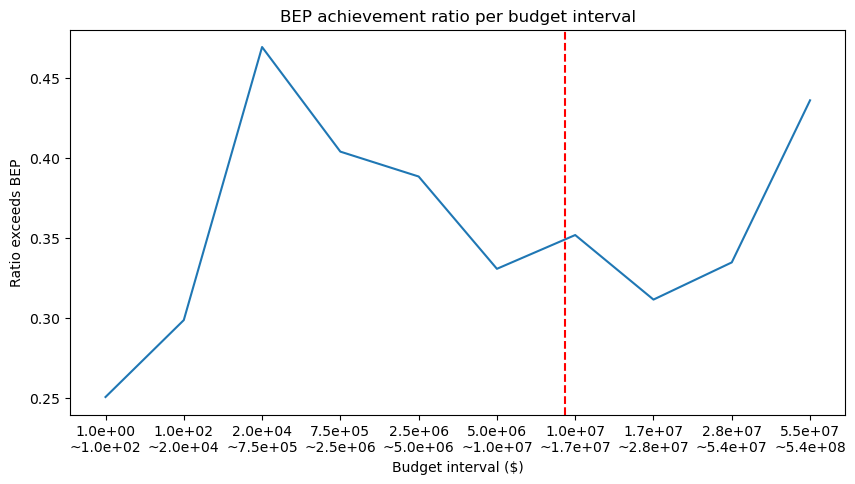

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(label_str, bep_over_ratios)
plt.xlabel('Budget interval ($)')
plt.ylabel('Ratio exceeds BEP')
plt.title('BEP achievement ratio per budget interval')

plt.axvline(x=min_idx / bin_size, color='r', linestyle='--')
plt.show()

After some simple calculations, we have found an optimal point. If we set the boundary for 'Low-budget' and 'High-budget' movies at $9,500,000, we can minimize the gap in the percentage of successful movies between the two groups. Additionally, this division allows for a reasonably balanced distribution of sample sizes between the groups, with a ratio of 58:42.

Therefore, by dividing our data at this midpoint or using the optimal point we just obtained, we can expect to conduct our analysis with a reduced risk of encountering errors such as Simpson's Paradox. This approach should allow for a more nuanced understanding of the data in our study.

**Conclusion for quick overview of movie data:**
- The ratio of each movie's revenue to its budget appears to follow a normal distribution. This could be useful when employing statistical analysis techniques.
- The probability of a movie's success does not strictly increase or decrease with the scale of its budget, and there is no clear difference in average success rates between low-budget and high-budget movies.
- Overall, 63.8% of movies fail to break even. This could lead to a scarcity of 'successful' movie data points when analyzing actor data.
- Significant variations in various factors depending on the year of a movie's production necessitate caution against Simpson's Paradox when analyzing the data.
